In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import json
import seaborn as sns

In [2]:
with open(f'C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/predictions/predictions_corr.json', 'r', encoding='utf-8') as f:
    all_results = json.load(f)

In [3]:
data = pd.DataFrame.from_dict(all_results)

In [4]:
real_values = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/probing_data/probing_test.csv")

In [5]:
real_values.head()

,id,sent,category,n_tokens,char_per_tok,upos_dist_DET,upos_dist_ADV,upos_dist_PUNCT,upos_dist_NUM,upos_dist_PRON,...,avg_max_depth,dep_dist_obj,dep_dist_nsubj,subj_pre,subj_post,n_prepositional_chains,avg_prepositional_chain_len,avg_subordinate_chain_len,subordinate_proposition_dist,avg_verb_edges
0,vit_VIT-1574,E anche Catanzaro ha le sue difficoltà.,1,8,4.571429,25.000000,12.500000,12.500000,0.0,0.000000,...,2,12.500000,12.500000,100.0,0.0,0,0.0,0.0,0.0,3.0
1,vit_VIT-418,"Per motivi evidenti, aveva detto qualche ora p...",1,31,4.821429,16.129032,6.451613,9.677419,0.0,0.000000,...,5,0.000000,6.451613,50.0,50.0,2,1.0,1.0,50.0,1.5
2,vit_VIT-5338,Il ritmo di lavoro è blando;,1,7,3.666667,14.285714,0.000000,14.285714,0.0,0.000000,...,3,0.000000,14.285714,100.0,0.0,1,1.0,0.0,0.0,0.0
3,postwita_5065,"Il presidente del Consiglio, Mario Monti, è ap...",2,24,5.700000,16.666667,4.166667,16.666667,0.0,0.000000,...,3,0.000000,4.166667,100.0,0.0,1,1.0,0.0,0.0,6.0
4,partut_it_partut-ud-1400,Ma nei corridoi del congresso degli Stati Unit...,3,18,4.625000,22.222222,0.000000,11.111111,0.0,5.555556,...,4,5.555556,5.555556,100.0,0.0,1,2.0,0.0,0.0,5.0


In [6]:
# def compute_correlation(row, df):
#     feature = row['ling_feature']
#     x = row["preds"]
#     y = df[feature].tolist()
#     res = stats.spearmanr(x, y).correlation
#     return res

# data["corr"] = data.apply(compute_correlation, axis=1, args=[real_values])

In [20]:
data["step"].unique()

array([    2,    32,   512,  8192, 15449,     0], dtype=int64)

In [8]:
data.to_json(f'C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/predictions/predictions_corr.json', orient="columns")

In [9]:
filtered_df = data[ (data['step'] != 0)]
all_features =filtered_df["ling_feature"].unique()
#grouped_df = filtered_df.groupby(['model', 'step']).agg({'corr': 'mean'}).reset_index()

In [10]:
all_features[0]

'n_tokens'

In [17]:
sns.set_theme(rc={'figure.figsize':(11.7,10)})

for feature in all_features:
    filtered_df = data[ (data['ling_feature'] == feature)]
    plot = sns.lineplot(data=filtered_df, x='step', y='corr', hue="model", marker='o', ci=None)
    plot.set(xlabel=f'{feature} reali', ylabel=f'{feature} predetti')
    plot.set_title(f"Andamento delle correlazioni tra le predizioni di {feature} e i valori reali dei modelli nei vari checkpoint\n")
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-{feature}")
    plt.clf()


<Figure size 842.4x720 with 0 Axes>

In [18]:
filtered_df = data[(data['step'] != 0)]
all_models =filtered_df["model"].unique()

In [19]:
sns.set_theme(rc={'figure.figsize':(11.7,10)})

for model in all_models:
    filtered_df = data[ (data['model'] == model)]
    plot = sns.lineplot(data=filtered_df, x='step', y='corr', hue="ling_feature", marker='o', ci=None)
    plot.set(xlabel=f'Valori reali', ylabel=f'Valori predetti')
    plot.set_title(f"Andamento delle correlazioni tra le predizioni del modello {model} e i valori reali delle feature nei vari checkpoint\n")
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-{model}")
    plt.clf()


<Figure size 842.4x720 with 0 Axes>

c:\Users\bergo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


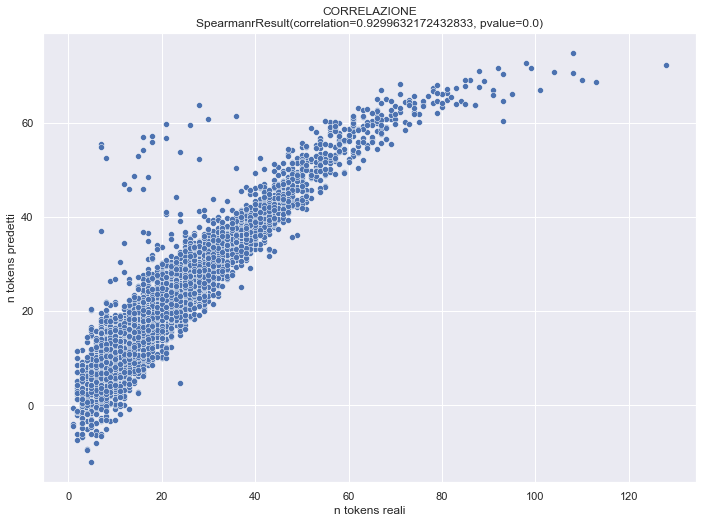

In [27]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})


plot = sns.scatterplot(x, y, x="N tokens reali", y="N tokens predetti")
plot.set(xlabel='n tokens reali', ylabel='n tokens predetti')
plot.set_title(f"CORRELAZIONE\n{res}")
fig = plot.get_figure()
fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/models/{training_id}/probing_results/prova.png")


In [28]:
checkpoints = data["step"].unique()
checkpoints

array([    2,    32,   512,  8192, 15449], dtype=int64)

In [29]:
features = data["ling_feature"].unique()
features

array(['n_tokens', 'char_per_tok', 'upos_dist_DET', 'upos_dist_ADV',
       'upos_dist_PUNCT', 'upos_dist_NUM', 'upos_dist_PRON',
       'upos_dist_ADP', 'upos_dist_PROPN', 'upos_dist_ADJ',
       'upos_dist_VERB', 'upos_dist_NOUN', 'upos_dist_CCONJ',
       'upos_dist_AUX', 'avg_links_len', 'max_links_len', 'avg_max_depth',
       'dep_dist_obj', 'dep_dist_nsubj', 'subj_pre', 'subj_post',
       'n_prepositional_chains', 'avg_prepositional_chain_len',
       'avg_subordinate_chain_len', 'subordinate_proposition_dist',
       'avg_verb_edges'], dtype=object)

In [30]:
layers = data["layer"].unique()
layers

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [31]:
data

,model,step,ling_feature,layer,preds
0,ANTI_CURRICULUM,2,n_tokens,1,"[14.2617378235, 26.5588474274, 17.3904933929, ..."
1,ANTI_CURRICULUM,2,n_tokens,2,"[14.1514997482, 27.2879371643, 15.549747467, 2..."
2,ANTI_CURRICULUM,2,n_tokens,3,"[11.9438457489, 27.3566741943, 15.1185798645, ..."
3,ANTI_CURRICULUM,2,n_tokens,4,"[13.2122097015, 26.7883872986, 17.9085960388, ..."
4,ANTI_CURRICULUM,2,n_tokens,5,"[14.4300756454, 27.6109771729, 16.7157745361, ..."
...,...,...,...,...,...
1035,ANTI_CURRICULUM,15449,avg_verb_edges,4,"[2.4327993393, 3.550909996, 1.192373395, 2.102..."
1036,ANTI_CURRICULUM,15449,avg_verb_edges,5,"[2.542453289, 2.9933393002, 1.327378273, 2.378..."
1037,ANTI_CURRICULUM,15449,avg_verb_edges,6,"[2.3473558426, 2.9784145355, 1.5979086161, 2.1..."
1038,ANTI_CURRICULUM,15449,avg_verb_edges,7,"[2.2342386246, 3.14443326, 1.5708684921, 2.171..."


In [32]:
data["preds"].loc[(data["step"]==2) & (data["layer"]==8) & (data["ling_feature"]=="n_tokens")].item()


[14.4033374786,
 29.4192523956,
 11.7669906616,
 26.3898162842,
 22.8467464447,
 22.731672287,
 19.9284381866,
 5.5244541168,
 56.6025695801,
 19.5736675262,
 12.4942750931,
 22.5631713867,
 39.8558425903,
 10.8334331512,
 26.9019870758,
 56.7863616943,
 16.7628936768,
 30.914150238,
 19.9939804077,
 18.5932178497,
 55.1506118774,
 53.4844894409,
 25.080083847,
 31.1321144104,
 10.0331249237,
 11.2271337509,
 7.4276018143,
 42.4924545288,
 24.4954719543,
 11.0320053101,
 11.5931816101,
 -2.9906892776,
 51.9944763184,
 23.5794887543,
 22.2954559326,
 29.6121768951,
 18.8420028687,
 41.1937866211,
 9.0569534302,
 55.7043304443,
 16.1461257935,
 30.2862892151,
 14.4217910767,
 8.2863473892,
 35.5816459656,
 20.2332019806,
 29.2009334564,
 12.2385349274,
 19.1123447418,
 5.0820035934,
 17.5186500549,
 24.7331466675,
 24.9803142548,
 9.4396486282,
 55.8627090454,
 48.2060623169,
 40.8426322937,
 27.9814682007,
 8.7743034363,
 63.0571289062,
 0.3586082458,
 41.0688476562,
 5.7867012024,
 5.2

In [33]:
from tqdm import tqdm
import warnings


warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")


for feature in tqdm(features):
    y = val_df[feature].tolist()
    for checkpoint in checkpoints:
        for layer in layers:
            x = data["preds"].loc[(data["step"]==checkpoint) & (data["layer"]==layer) & (data["ling_feature"]==feature)].item()
            corr = stats.spearmanr(x, y)
            plt.figure()
            plot = sns.scatterplot(x, y)
            plot.set(xlabel='valori reali', ylabel='valori predetti')
            plot.set_title(F"PREDICTION DELLA FEATUERE {feature} DEL MODELLO {training_id} allo step {checkpoint} nello strato {layer} \n{corr}")
            fig = plot.get_figure() 
            fig_name = f'{training_id}_c{checkpoint}_l{layer}_{feature}.png'
            fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/models/{training_id}/probing_results/{fig_name}")
            plt.clf()


            

  0%|          | 0/26 [00:00<?, ?it/s]c:\Users\bergo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\bergo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\bergo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing o

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

  0%|          | 0/26 [00:00<?, ?it/s]

C:\Users\bergo\AppData\Local\Temp\ipykernel_19776\4089508738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["real_values"] = [y] * len(filtered_df)
  0%|          | 0/26 [00:01<?, ?it/s]


<Figure size 842.4x595.44 with 0 Axes>

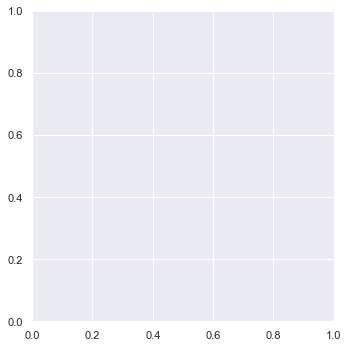

In [84]:
for feature in tqdm(features):
    y = val_df[feature].tolist()
    for checkpoint in checkpoints:
        filtered_df = data.loc[(data["ling_feature"]==feature) & (data["step"]==checkpoint)]
        filtered_df["real_values"] = [y] * len(filtered_df)
        plt.figure()
        plot = sns.lmplot(data=filtered_df, x="preds", y="real_values", hue="layer" )
        # plot.set(xlabel='valori reali', ylabel='valori predetti')
        # plot.set_title(F"PREDICTION DELLA FEATUERE {feature} DEL MODELLO {training_id} allo step {checkpoint} nello strato {layer} \n{corr}")
        # fig = plot.get_figure() 
        # fig_name = f'{training_id}_c{checkpoint}_l{layer}_{feature}.png'
        # fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/models/{training_id}/probing_results/{fig_name}")
        plt.clf()


            

In [19]:
y = data["preds"].loc[(data["step"]==2) & (data["layer"]==8) & (data["ling_feature"]=="n_tokens")].item()
filtered_df = data.loc[(data["ling_feature"]=="n_tokens") & (data["step"]==2)]
filtered_df["real_values"] = [y] * len(filtered_df)

ValueError: can only convert an array of size 1 to a Python scalar

In [16]:
filtered_df

,model,step,ling_feature,layer,preds,real_values
0,RANDOM_S21,2,n_tokens,1,"[12.6691207886, 28.7228660583, 17.3340454102, ...","[14.631196022, 29.9293670654, 11.6372518539, 2..."
1,RANDOM_S21,2,n_tokens,2,"[12.7494678497, 27.0105323792, 16.1931152344, ...","[14.631196022, 29.9293670654, 11.6372518539, 2..."
2,RANDOM_S21,2,n_tokens,3,"[11.0687561035, 28.734418869, 17.0390281677, 2...","[14.631196022, 29.9293670654, 11.6372518539, 2..."
3,RANDOM_S21,2,n_tokens,4,"[12.6955413818, 29.0379600525, 18.3202438354, ...","[14.631196022, 29.9293670654, 11.6372518539, 2..."
4,RANDOM_S21,2,n_tokens,5,"[14.8342075348, 28.661907196, 17.9682865143, 2...","[14.631196022, 29.9293670654, 11.6372518539, 2..."
5,RANDOM_S21,2,n_tokens,6,"[11.6485748291, 29.7382411957, 13.9054450989, ...","[14.631196022, 29.9293670654, 11.6372518539, 2..."
6,RANDOM_S21,2,n_tokens,7,"[16.0026359558, 29.828578949, 15.5873250961, 2...","[14.631196022, 29.9293670654, 11.6372518539, 2..."
7,RANDOM_S21,2,n_tokens,8,"[14.631196022, 29.9293670654, 11.6372518539, 2...","[14.631196022, 29.9293670654, 11.6372518539, 2..."


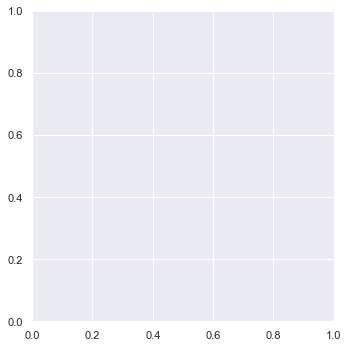

In [18]:
sns.lmplot(data=filtered_df, x="preds", y="real_values", hue="layer" )

<Figure size 720x432 with 0 Axes>

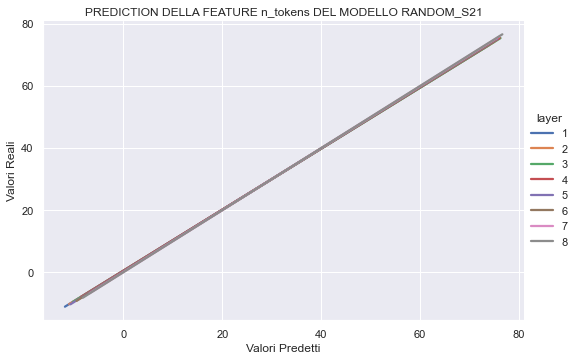

In [18]:
df_exploded = filtered_df.explode(['preds', 'real_values'])

# Convertire le colonne esplose in tipo float
df_exploded['preds'] = df_exploded['preds'].astype(float)
df_exploded['real_values'] = df_exploded['real_values'].astype(float)

# Creare il grafico con sns.lmplot
plt.figure(figsize=(10, 6))
plot = sns.lmplot(data=df_exploded, x="preds", y="real_values", hue="layer", aspect=1.5, ci=None, scatter=False)
plot.set_axis_labels('Valori Predetti', 'Valori Reali')
plt.title("PREDICTION DELLA FEATURE n_tokens DEL MODELLO RANDOM_S21")

# Salvare il grafico
fig_name = 'RANDOM_S21_combined_layers_n_tokens.png'
plt.savefig(f"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/models/RANDOM_S21/probing_results/{fig_name}")

plt.show()